<h2><center>Intertemporal Choice: A Laboratory Investigation of Choice Behavior under Additive and Compound Wealth Growth</center></h2>
<b><center>Barry Sopher, Department of Economics, Rutgers University</center></b>
<i><center>With research assistance from Himesh Buch, James Hadley and Aaron Scheiner</center></i>

In [0]:
# Requied libraries/packages
# ==========================
require(MASS)
install.packages("devtools")
library(devtools)
library(ggplot2)

In [0]:
main_data <- read.csv(file="/content/stacked-data-ergodicity.csv",header = TRUE)
summary(main_data)

    first_name      last_name            login_id              start_time 
 Joseph  :  42   Patel   :  63   ac1887      :  21   2/26/2020 12:13:294  
 Nicholas:  42   Shah    :  63   acm298      :  21   2/25/2020 10:16:168  
 Ryan    :  42   Parekh  :  42   ah1123      :  21   2/26/2020 10:13:147  
 Aditya  :  21   Ackerley:  21   aka99       :  21   2/24/2020 10:13:126  
 Akil    :  21   Ahmed   :  21   al1104      :  21   2/24/2020 12:10:126  
 Alan    :  21   Ahmmed  :  21   aman.s.gupta:  21   2/25/2020 12:13:105  
 (Other) :1365   (Other) :1323   (Other)     :1428   (Other)        :588  
            end_time       duration       treatment        session     
 2/24/2020 10:26:  63   Min.   : 3.00   Min.   :1.000   Min.   :1.000  
 2/26/2020 12:27:  63   1st Qu.: 8.00   1st Qu.:1.000   1st Qu.:2.000  
 2/24/2020 10:23:  42   Median :12.50   Median :1.000   Median :4.000  
 2/24/2020 12:18:  42   Mean   :12.99   Mean   :1.473   Mean   :3.676  
 2/25/2020 10:25:  42   3rd Qu.:16.00   

***Looking at the above code snippet and its result, we will only focus on our response variable (choice) and all independent variables (Xa, Xb, H, D, T) in  this course of action. These results might be useful in future***


In [0]:
# Regression
# ==========
lmod <- lm(choice ~ Xa+Xb+H+D+T , data=main_data)           # linear model regression
summary(lmod)


Call:
lm(formula = choice ~ Xa + Xb + H + D + T, data = main_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00700 -0.31518  0.04834  0.33846  0.87492 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.128372   0.075703   1.696   0.0901 .  
Xa          -0.182942   0.116654  -1.568   0.1170    
Xb           0.091822   0.073814   1.244   0.2137    
H            0.128112   0.012905   9.927   <2e-16 ***
D                  NA         NA      NA       NA    
T           -0.002266   0.001415  -1.602   0.1094    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4186 on 1549 degrees of freedom
Multiple R-squared:  0.2533,	Adjusted R-squared:  0.2514 
F-statistic: 131.4 on 4 and 1549 DF,  p-value: < 2.2e-16


***Results above show that, among all of our independent variables, Horizon (H) has the least P-Value, making it the most important variable which affects the response variable the most. We can even ignore the other variables***

In [0]:
anova(lmod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Xa,1,48.816593,48.8165934,278.637384,1.187734e-57
Xb,1,2.291036,2.2910356,13.076868,3.085475e-04
H,1,40.521987,40.5219869,231.293084,8.655774e-49
T,1,0.449608,0.4496080,2.566292,1.093673e-01
Residuals,1549,271.381040,0.1751976,NA,NA


In [0]:
coef(lmod)

(Intercept)           Xa           Xb            H            D            T 
 0.128372093 -0.182941842  0.091822044  0.128112081           NA -0.002266454

***The above result help us come up with the multiple linear regression model***

In [0]:
confint(lmod)             # CI at 95%
confint(lmod, level=.99)  # CI at 99%

,2.5 %,97.5 %
(Intercept),-0.020118423,0.2768626099
Xa,-0.411757689,0.0458740057
Xb,-0.052963646,0.2366077338
H,0.102798400,0.1534257627
D,NA,NA
T,-0.005041571,0.0005086641


,0.5 %,99.5 %
(Intercept),-0.066865600,0.323609787
Xa,-0.483792559,0.117908875
Xb,-0.098544485,0.282188573
H,0.094829250,0.161394912
D,NA,NA
T,-0.005915222,0.001382315


***We have computed the 95% and 99% confidence interval for our model. One can confirm the results by comparing the P-Values. This result can be very useful for the hypothesis testing, as it will help to determine whether to ignore the null hypothesis or not***

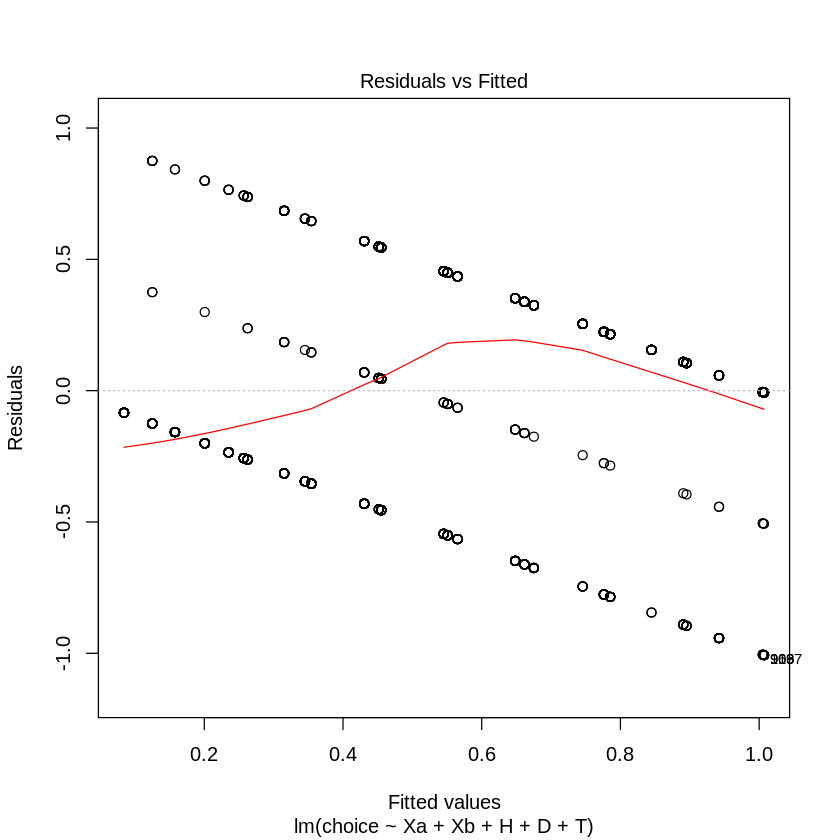

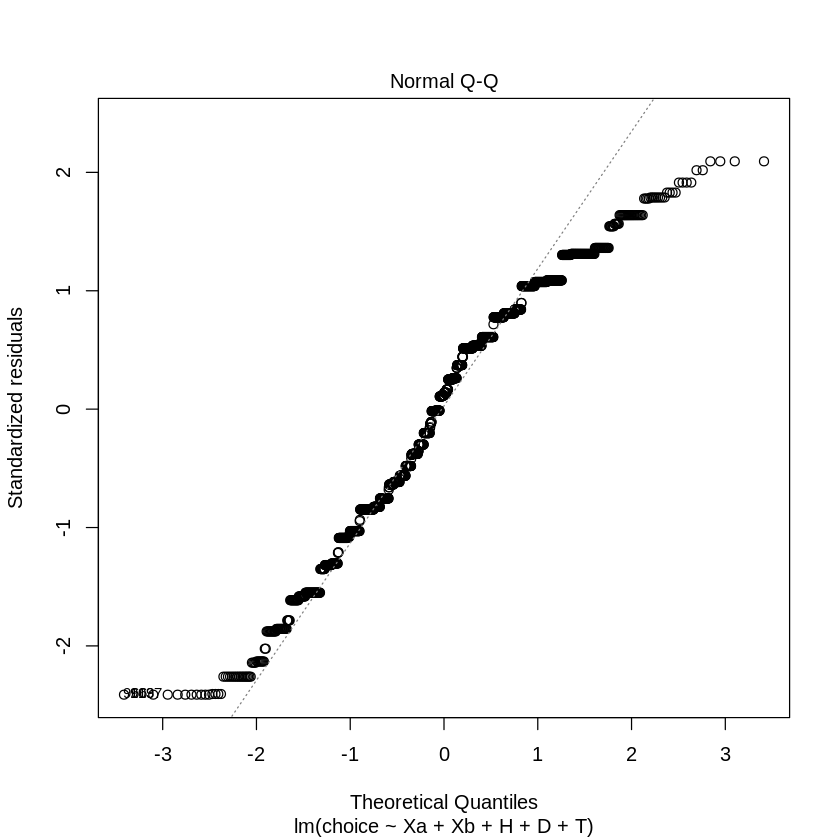

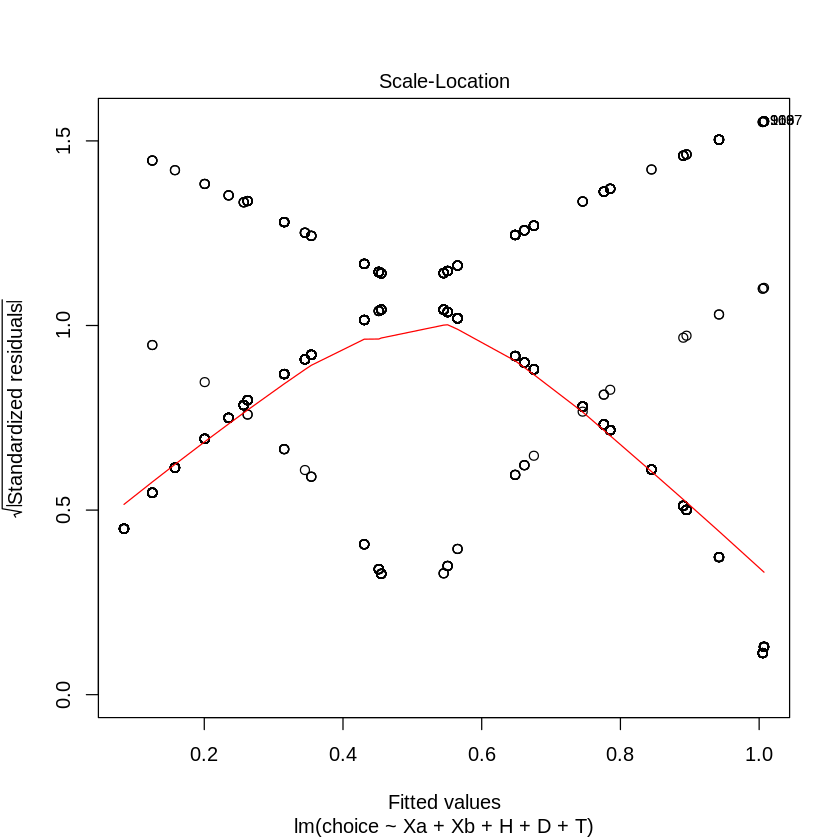

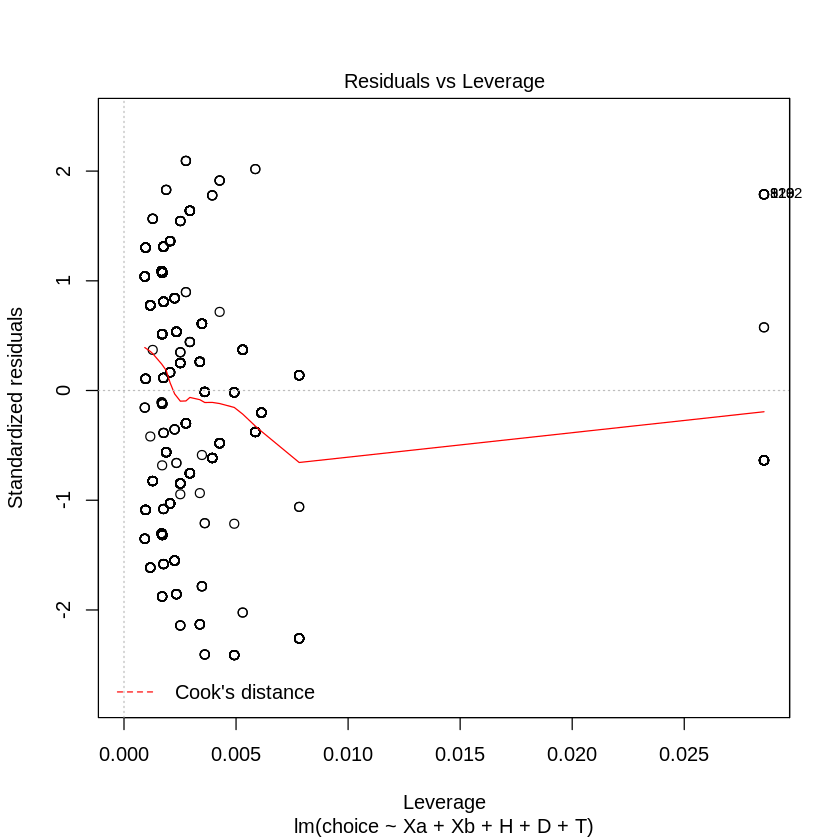

In [0]:
plot(lmod)

***These are the graphs generated by the regression analysis. Each graph helps us understand different things about residuals and distribution of the data. Here is what each graph represents:*** 

1. ***Residual(errors) vs Fitted:*** linearity of the modal and shows if residuals have non-linear patterns
2. ***Normal Q-Q plot (Normal Quantile-Quantile plot):*** shows if residuals are normally distributed
3. ***Scale-Location:*** shows if residuals are spread equally along the ranges of predictors
4. ***Residuals vs Leverage:*** helps us to find influential cases (robust regression can also help)



In [0]:
lmod_g <- glm(choice ~ Xa+Xb+H+D+T , data=main_data)        # generalized linear model
summary(lmod_g)


Call:
glm(formula = choice ~ Xa + Xb + H + D + T, data = main_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.00700  -0.31518   0.04834   0.33846   0.87492  

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.128372   0.075703   1.696   0.0901 .  
Xa          -0.182942   0.116654  -1.568   0.1170    
Xb           0.091822   0.073814   1.244   0.2137    
H            0.128112   0.012905   9.927   <2e-16 ***
D                  NA         NA      NA       NA    
T           -0.002266   0.001415  -1.602   0.1094    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.1751976)

    Null deviance: 363.46  on 1553  degrees of freedom
Residual deviance: 271.38  on 1549  degrees of freedom
AIC: 1710.2

Number of Fisher Scoring iterations: 2


***Here is a generalized linear modal. The modal lmod was a simple linear modal, where this modal helps us understand the exponentiality of the distribution***

In [0]:
anova(lmod_g)

,Df,Deviance,Resid. Df,Resid. Dev
,<int>,<dbl>,<int>,<dbl>
NULL,NA,NA,1553,363.4603
Xa,1,48.816593,1552,314.6437
Xb,1,2.291036,1551,312.3526
H,1,40.521987,1550,271.8306
D,0,0.000000,1550,271.8306
T,1,0.449608,1549,271.3810


In [0]:
confint(lmod_g)             # CI at 95%
confint(lmod_g, level=.99)  # CI at 99%

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-0.020002396,0.2767465833
Xa,-0.411578898,0.0456952149
Xb,-0.052850514,0.2364946020
H,0.102818179,0.1534059832
D,NA,NA
T,-0.005039403,0.0005064957


Waiting for profiling to be done...



,0.5 %,99.5 %
(Intercept),-0.066625040,0.32336923
Xa,-0.483421869,0.11753818
Xb,-0.098309926,0.28195401
H,0.094870259,0.16135390
D,NA,NA
T,-0.005910727,0.00137782


***In the above snippets, we looked at generalized linear modal and its anova along with the confidence intervals***

In [0]:
lmod_gnb <- glm.nb(choice ~ Xa+Xb+H+D+T , data=main_data)   # negative binomial model

In [0]:
summary(lmod_gnb)


Call:
glm.nb(formula = choice ~ Xa + Xb + H + D + T, data = main_data, 
    init.theta = 20592.51732, link = log)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.52843  -0.82247   0.05077   0.46607   1.20075  

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.450862   0.281308  -5.158  2.5e-07 ***
Xa          -0.514161   0.526948  -0.976    0.329    
Xb           0.285997   0.339990   0.841    0.400    
H            0.240630   0.041925   5.740  9.5e-09 ***
D                  NA         NA      NA       NA    
T           -0.005057   0.005276  -0.958    0.338    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(20592.52) family taken to be 1)

    Null deviance: 1026.87  on 1553  degrees of freedom
Residual deviance:  855.72  on 1549  degrees of freedom
AIC: 2543.7

Number of Fisher Scoring iterations: 1


              Th

In [0]:
anova(lmod_gnb)

Warning message in anova.negbin(lmod_gnb):
“tests made without re-estimating 'theta'”


,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,1553,1026.8667,NA
Xa,1,82.2917733,1552,944.5749,1.174098e-19
Xb,1,4.8276907,1551,939.7472,2.800612e-02
H,1,83.1065249,1550,856.6407,7.774863e-20
D,0,0.0000000,1550,856.6407,NA
T,1,0.9220767,1549,855.7186,3.369303e-01


In [0]:
confint(lmod_gnb)             # CI at 95%
confint(lmod_gnb, level=.99)  # CI at 99%

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-2.0067405,-0.903729261
Xa,-1.6512186,0.437843122
Xb,-0.3220629,1.026101982
H,0.1589407,0.323315416
D,NA,NA
T,-0.0154445,0.005246005


Waiting for profiling to be done...



,0.5 %,99.5 %
(Intercept),-2.18335716,-0.733467723
Xa,-2.05922968,0.708823322
Xb,-0.49258754,1.294168864
H,0.13346256,0.349516468
D,NA,NA
T,-0.01872919,0.008469432


***In the above snippets, we also looked at negative binomial distribution model and its anova along with the confidence intervals***

***Now we are considering different types of regression modals***

In [0]:
install.packages("olsrr")

In [0]:
# Different types of regression
# =============================
require(olsrr)
main_data <- read.csv(file="/stacked-data-ergodicity.csv",header = TRUE)
lmod <- lm(choice ~ Xa+Xb+H+D+T , data=main_data)           # linear model regression
k <- ols_step_all_possible(lmod)    # all possible regressions

***Here's the ouput generated by R for k in the above snippet:***

```
   Index N  Predictors    R-Square Adj. R-Square Mallow's Cp
3      1 1           H 0.251406437  0.2509240962    3.012463
2      2 1          Xb 0.137924879  0.1373694180  238.438312
1      3 1          Xa 0.134310675  0.1337528854  245.936244
5      4 1           T 0.000129974 -0.0005142721  524.303987
4      5 1           D 0.000000000  0.0000000000  522.573628
7      6 2        Xa H 0.251644988  0.2506799914    4.517572
10     7 2        Xb H 0.251573823  0.2506087346    4.665209
14     8 2         H T 0.251406636  0.2504413317    5.012051
13     9 2         H D 0.251406437  0.2509240962    3.012463
9     10 2        Xa T 0.205578190  0.2045537901  100.086537
12    11 2        Xb T 0.205295974  0.2042712108  100.672014
6     12 2       Xa Xb 0.140614075  0.1395059054  234.859375
11    13 2        Xb D 0.137924879  0.1373694180  238.438312
8     14 2        Xa D 0.134310675  0.1337528854  245.936244
15    15 2         D T 0.000129974 -0.0005142721  524.303987
20    16 3      Xa H T 0.252594638  0.2511480467    4.547454
23    17 3      Xb H T 0.252155056  0.2507076139    5.459399
16    18 3     Xa Xb H 0.252103531  0.2506559893    5.566292
19    19 3      Xa H D 0.251644988  0.2506799914    4.517572
22    20 3      Xb H D 0.251573823  0.2506087346    4.665209
25    21 3       H D T 0.251406636  0.2504413317    5.012051
18    22 3     Xa Xb T 0.205838121  0.2043010331  101.547291
21    23 3      Xa D T 0.205578190  0.2045537901  100.086537
24    24 3      Xb D T 0.205295974  0.2042712108  100.672014
17    25 3     Xa Xb D 0.140614075  0.1395059054  234.859375
27    26 4   Xa Xb H T 0.253340552  0.2514124450    5.000000
29    27 4    Xa H D T 0.252594638  0.2511480467    4.547454
30    28 4    Xb H D T 0.252155056  0.2507076139    5.459399
26    29 4   Xa Xb H D 0.252103531  0.2506559893    5.566292
28    30 4   Xa Xb D T 0.205838121  0.2043010331  101.547291
31    31 5 Xa Xb H D T 0.253340552  0.2514124450    5.000000

```


[[1]]
NULL

[[2]]
NULL


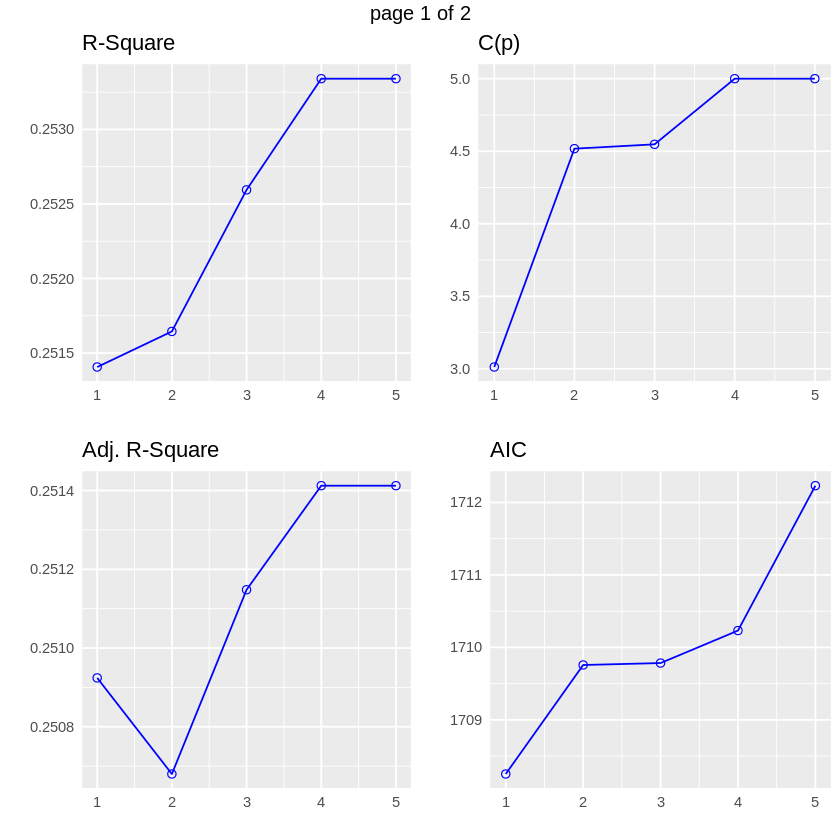

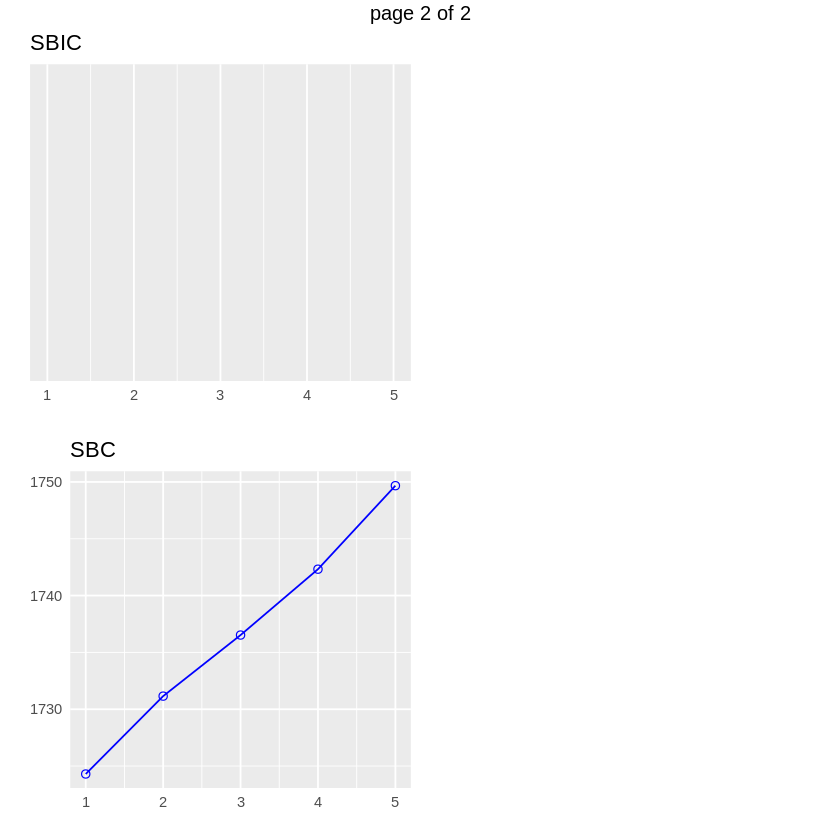

In [24]:
k <- ols_step_best_subset(lmod, print_plot = TRUE)    # best subset regregression
plot(k)

***Here is the output generated by R for k in the above snippet:***

```
Best Subsets Regression  
--------------------------
Model Index    Predictors
--------------------------
     1         H           
     2         Xa H        
     3         Xa H T      
     4         Xa Xb H T   
     5         Xa Xb H D T 
--------------------------

                           Subsets Regression Summary                                                  
--------------------------------------------------------------------------------
                       Adj.        Pred                                                                                        
Model    R-Square    R-Square    R-Square     C(p)        AIC       SBIC        
--------------------------------------------------------------------------------
  1        0.2514      0.2509      0.2496    3.0125    1708.2523      NA     
  2        0.2516      0.2507      0.2487    4.5176    1709.7570      NA    
  3        0.2526      0.2511      0.2488    4.5475    1709.7837      NA    
  4        0.2533      0.2514      0.2486    5.0000    1710.2321      NA    
  5        0.2533      0.2514      0.2486    5.0000    1712.2321      NA     
--------------------------------------------------------------------------------

Model        SBC         MSEP       FPE       HSP      APC
--------------------------------------------------------------------------------
  1       1724.2980    272.4346    0.1755    1e-04    0.7505
  2       1731.1513    272.5235    0.1757    1e-04    0.7513 
  3       1736.5267    272.3534    0.1757    1e-04    0.7513 
  4       1742.3236    272.2574    0.1758    1e-04    0.7515 
  5       1749.6722    272.2574    0.1758    1e-04    0.7515


 AIC: Akaike Information Criteria 
 SBIC: Sawa's Bayesian Information Criteria 
 SBC: Schwarz Bayesian Criteria 
 MSEP: Estimated error of prediction, assuming multivariate normality 
 FPE: Final Prediction Error 
 HSP: Hocking's Sp 
 APC: Amemiya Prediction Criteria 
```




In [26]:
# forward stepwise regression
# ===========================
k <- ols_step_forward_p(lmod,details=TRUE)
k

Forward Selection Method    
---------------------------

Candidate Terms: 

1. Xa 
2. Xb 
3. H 
4. D 
5. T 

We are selecting variables based on p value...



Note: model has aliased coefficients
      sums of squares computed by model comparison




Forward Selection: Step 1 

- H 

                        Model Summary                          
--------------------------------------------------------------
R                       0.501       RMSE                0.419 
R-Squared               0.251       Coef. Var          76.684 
Adj. R-Squared          0.251       MSE                 0.175 
Pred R-Squared          0.250       MAE                 0.358 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                  
----------------------------------------------------------------------
               Sum of                                                 
              Squares          DF    Mean Square       F         Sig. 
----------------------------------------------------------------------
Regression     91.376           1         91.376    521.221    0.0000 
Residual    

Note: model has aliased coefficients
      sums of squares computed by model comparison




No more variables to be added.

Variables Entered: 

+ H 


Final Model Output 
------------------

                        Model Summary                          
--------------------------------------------------------------
R                       0.501       RMSE                0.419 
R-Squared               0.251       Coef. Var          76.684 
Adj. R-Squared          0.251       MSE                 0.175 
Pred R-Squared          0.250       MAE                 0.358 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                  
----------------------------------------------------------------------
               Sum of                                                 
              Squares          DF    Mean Square       F         Sig. 
----------------------------------------------------------------------
Regression     91


                            Selection Summary                             
-------------------------------------------------------------------------
        Variable                  Adj.                                       
Step    Entered     R-Square    R-Square     C(p)        AIC        RMSE     
-------------------------------------------------------------------------
   1    H             0.2514      0.2509    3.0125    1708.2523    0.4187    
-------------------------------------------------------------------------

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



[[1]]
NULL

[[2]]
NULL


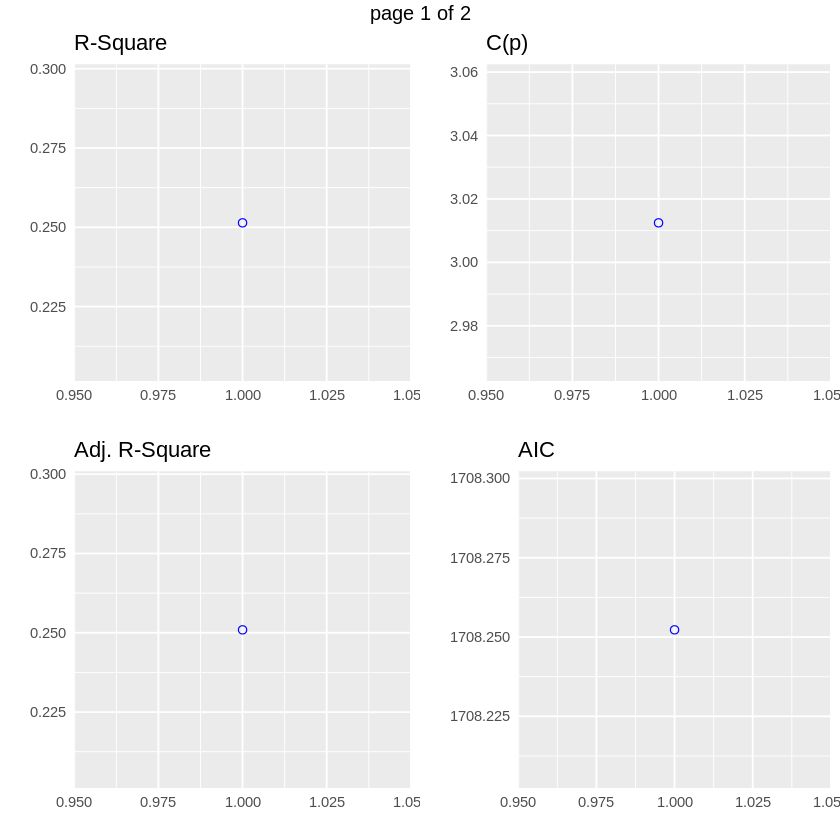

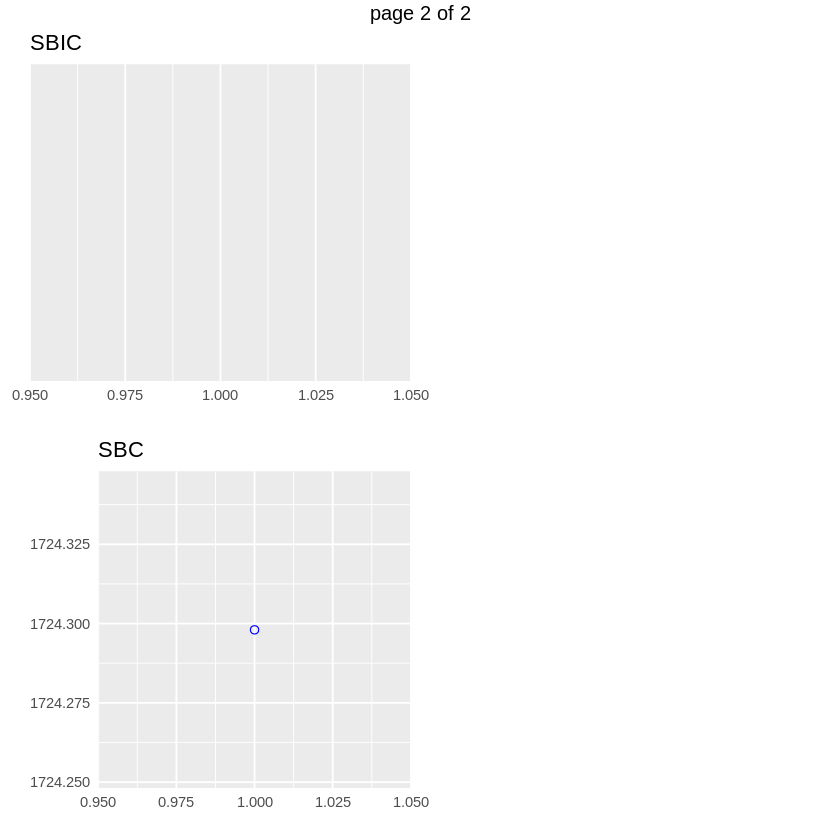

In [27]:
plot(k)

**Explanation:** 
*Build regression model from a set of candidate predictor variables by entering predictors based on p values, in a stepwise manner until there is no variable left to enter any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.*

In [28]:
# backward stepwise regression
# ============================
k <- ols_step_backward_p(lmod,details=TRUE)
k

Backward Elimination Method 
---------------------------

Candidate Terms: 

1 . Xa 
2 . Xb 
3 . H 
4 . D 
5 . T 

We are eliminating variables based on p value...



Note: model has aliased coefficients
      sums of squares computed by model comparison




No more variables satisfy the condition of p value = 0.3


Variables Removed: 



Final Model Output 
------------------

                        Model Summary                          
--------------------------------------------------------------
R                       0.503       RMSE                0.419 
R-Squared               0.253       Coef. Var          76.659 
Adj. R-Squared          0.251       MSE                 0.175 
Pred R-Squared          0.249       MAE                 0.357 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                  
----------------------------------------------------------------------
               Sum of                                                 
              Squares          DF    Mean Square       F         Sig. 
------------------------------------------------------------------

[1] "No variables have been removed from the model."

***Explanation***:
*Build regression model from a set of candidate predictor variables by removing predictors based on p values, in a stepwise manner until there is no variable left to remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed*

In [30]:
# sequential (both directions) stepwise regression
# ================================================
k <- ols_step_both_p(lmod,details=TRUE)
k

Stepwise Selection Method   
---------------------------

Candidate Terms: 

1. Xa 
2. Xb 
3. H 
4. D 
5. T 

We are selecting variables based on p value...



Note: model has aliased coefficients
      sums of squares computed by model comparison




Stepwise Selection: Step 1 

- H added 

                        Model Summary                          
--------------------------------------------------------------
R                       0.501       RMSE                0.419 
R-Squared               0.251       Coef. Var          76.684 
Adj. R-Squared          0.251       MSE                 0.175 
Pred R-Squared          0.250       MAE                 0.358 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                  
----------------------------------------------------------------------
               Sum of                                                 
              Squares          DF    Mean Square       F         Sig. 
----------------------------------------------------------------------
Regression     91.376           1         91.376    521.221    0.0000 
Resid

Note: model has aliased coefficients
      sums of squares computed by model comparison




No more variables to be added/removed.


Final Model Output 
------------------

                        Model Summary                          
--------------------------------------------------------------
R                       0.501       RMSE                0.419 
R-Squared               0.251       Coef. Var          76.684 
Adj. R-Squared          0.251       MSE                 0.175 
Pred R-Squared          0.250       MAE                 0.358 
--------------------------------------------------------------
 RMSE: Root Mean Square Error 
 MSE: Mean Square Error 
 MAE: Mean Absolute Error 

                                ANOVA                                  
----------------------------------------------------------------------
               Sum of                                                 
              Squares          DF    Mean Square       F         Sig. 
----------------------------------------------------------------------
Regression     91.376           1   


                             Stepwise Selection Summary                               
-------------------------------------------------------------------------------------
                     Added/                   Adj.                                       
Step    Variable    Removed     R-Square    R-Square     C(p)        AIC        RMSE     
-------------------------------------------------------------------------------------
   1       H        addition       0.251       0.251    3.0120    1708.2523    0.4187    
-------------------------------------------------------------------------------------

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



[[1]]
NULL

[[2]]
NULL


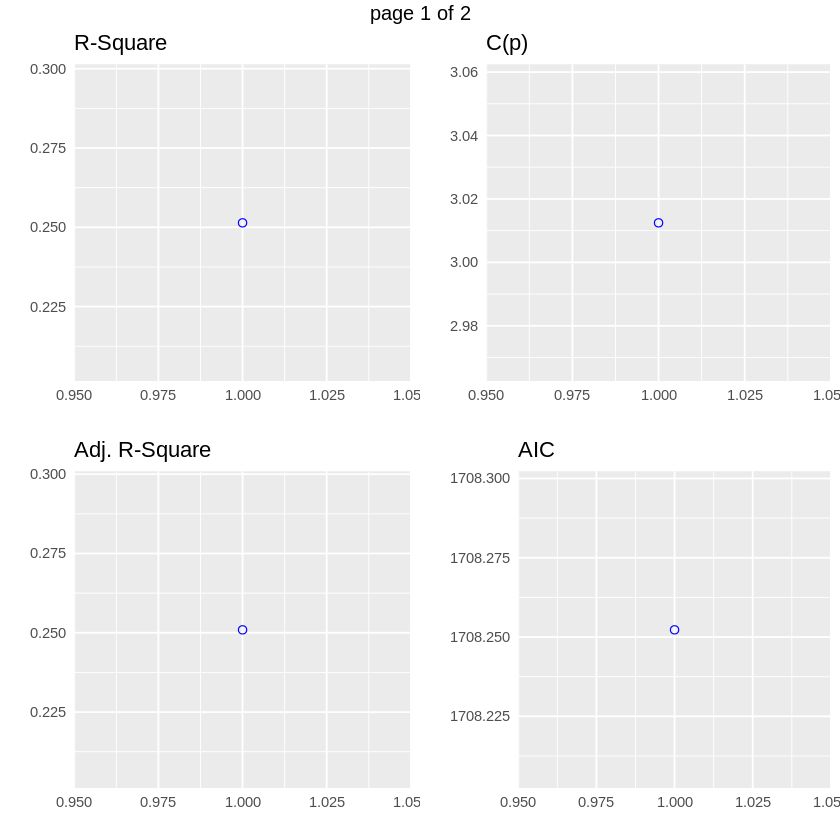

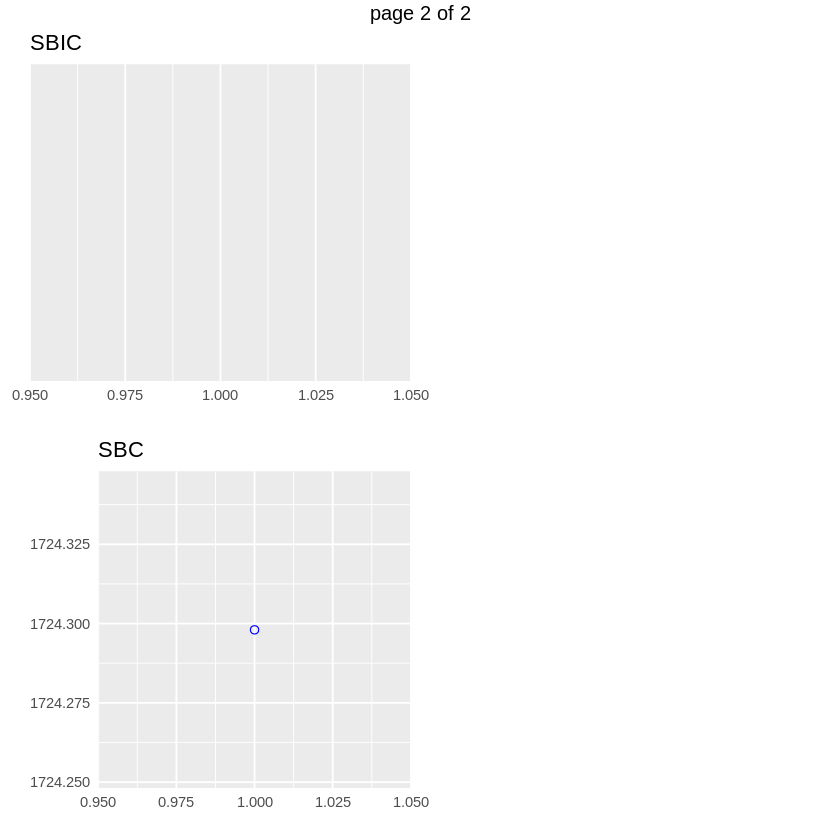

In [31]:
plot(k)

***Explanation***:
*Build regression model from a set of candidate predictor variables by entering and removing predictors based on p values, in a stepwise manner until there is no variable left to enter or remove any more. The model should include all the candidate predictor variables. If details is set to TRUE, each step is displayed.*

In [32]:
# Stepwise models based on Akaike Information Criteria criterion
# ==============================================================
k <- ols_step_forward_aic(lmod)       # forward selection
k


                        Selection Summary                          
------------------------------------------------------------------
Variable       AIC       Sum Sq      RSS       R-Sq      Adj. R-Sq 
------------------------------------------------------------------
H            1708.252    91.376    272.084    0.25141      0.25092 
------------------------------------------------------------------

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



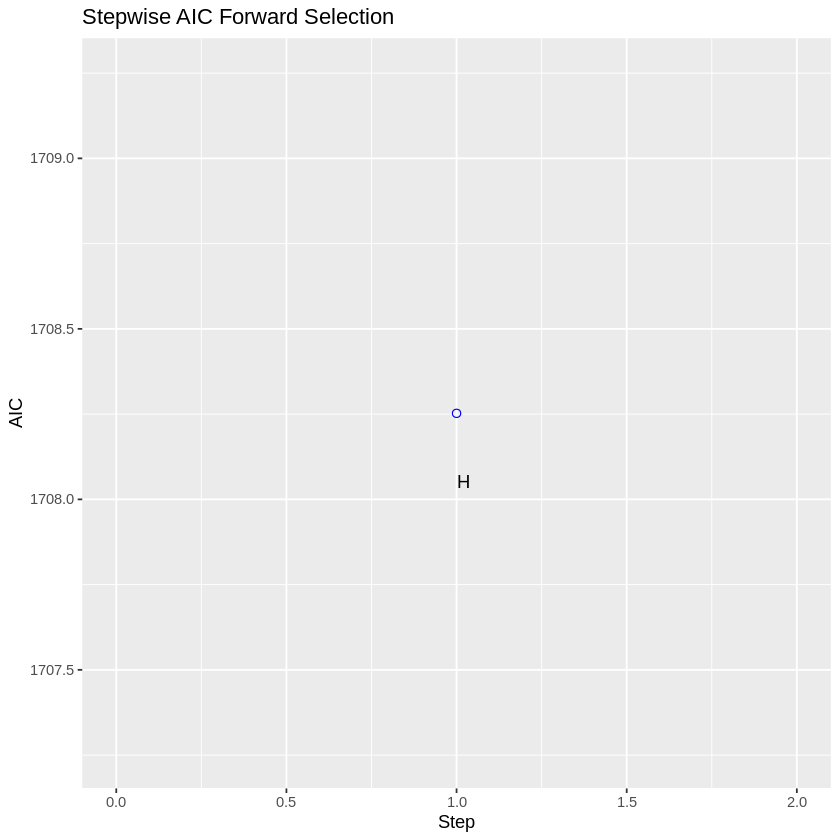

In [33]:
plot(k)

In [35]:
k <- ols_step_both_aic(lmod)          # both sides
k



                               Stepwise Summary                                
-----------------------------------------------------------------------------
Variable     Method       AIC         RSS      Sum Sq     R-Sq      Adj. R-Sq 
-----------------------------------------------------------------------------
H           addition    1708.252    272.084    91.376    0.25141      0.25092 
-----------------------------------------------------------------------------


geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



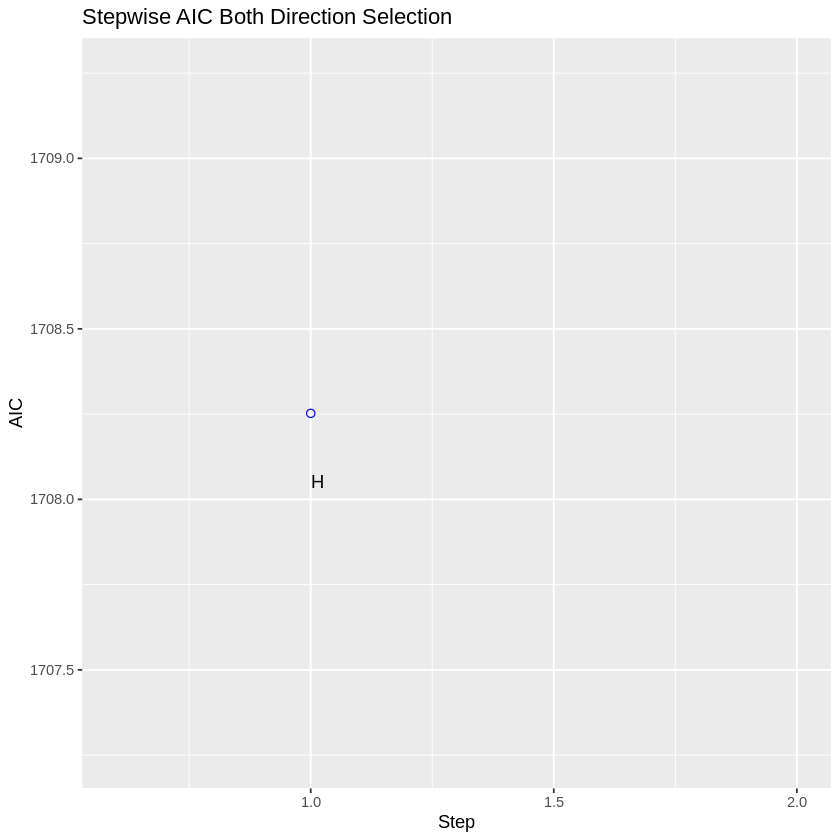

In [37]:
plot(k)